In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r'C:\Users\Mrunal Metkar\ML_self_practice\Practice_4_LR_UsingGD\data.txt',names=['Population','Profit'])

In [4]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
x=pd.DataFrame(data['Population'])
y=pd.DataFrame(data['Profit'])

In [6]:
len(y)

97

In [7]:
m=len(y)
m

97

Text(0, 0.5, 'Profit')

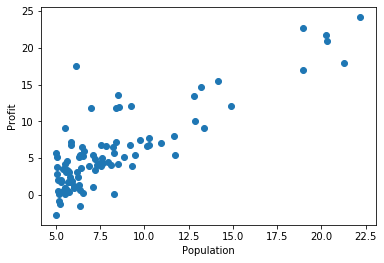

In [8]:
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('Profit')

In [9]:
x['intercept']=1

In [10]:
iterations=1500
alpha=0.01
x1=np.array(x)
y1=np.array(y).flatten()

In [11]:
y1

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [12]:
theta=np.array([0,0])

In [19]:
theta.shape

(2,)

In [20]:
x

,Population,intercept
0,6.1101,1
1,5.5277,1
2,8.5186,1
3,7.0032,1
4,5.8598,1
5,8.3829,1
6,7.4764,1
7,8.5781,1
8,6.4862,1
9,5.0546,1


In [21]:
(x.dot(theta))

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
     ... 
67    0.0
68    0.0
69    0.0
70    0.0
71    0.0
72    0.0
73    0.0
74    0.0
75    0.0
76    0.0
77    0.0
78    0.0
79    0.0
80    0.0
81    0.0
82    0.0
83    0.0
84    0.0
85    0.0
86    0.0
87    0.0
88    0.0
89    0.0
90    0.0
91    0.0
92    0.0
93    0.0
94    0.0
95    0.0
96    0.0
Length: 97, dtype: float64

In [17]:
def costfunction(x,y,theta):
    J=np.sum((x.dot(theta)-y)**2)/2/m
    return J

In [18]:
costfunction(x1,y1,theta)

32.072733877455676

In [42]:
def gradient_descent(x,y,theta,alpha,iterations):
    cost_hist=[0]*iterations
    for iteration in range(iterations):
        hypothesis=x.dot(theta)
        loss=hypothesis-y
        gradient=x.T.dot(loss)/m
        
        theta=theta-alpha*gradient
        cost=costfunction(x,y,theta)
        cost_hist[iteration]=cost
    print(gradient)
    return theta,cost_hist

In [43]:
t,c=gradient_descent(x1,y1,theta,alpha,iterations)
print (t)

[-0.00481644  0.04794344]
[ 1.16636235 -3.63029144]


In [30]:
new_data_predictval=np.linspace(0,25,20)
pred_val=[t[1]+t[0]*i for i in new_data_predictval]

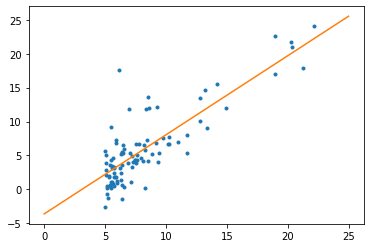

In [41]:
x_df=pd.DataFrame(data['Population'])
y_df=pd.DataFrame(data['Profit'])
plt.plot(x_df,y_df,'.')
plt.plot(new_data_predictval,pred_val)